(sec:random)=
# Osnove naključnih procesov

Dinamične obremenitve pogosto niso deterministične; primeri naključnih obremenitve so: obremenitve zaradi morskih valov, hrapavost ceste in vibracije zaradi pogonskega motorja. Take obremenitve je treba obravnavati kot **naključne procese**. V tem poglavju si bomo pogledali kako to naredimo in kako jih potem uspešno uporabimo pri obravnavi dinamskih sistemov. 

Naključnih podatkov v nasprotju z determinističnimi podatki ni mogoče natančno predvideti, določene značilnosti pa lahko razberemo z analizo njihovih segmentov; če na primer pomerimo hrapavost segmenta površine, lahko z določeno verjetnostjo sklepamo o značilnostih hrapavosti drugih segmentov. Pri opisu naključnih procesov si pogosto pomagamo s predpostavko naključni porazdelitvi procesa (npr. normalno ali Gaussovo porazdeljen proces).

Medtem, ko bi lahko naključni proces analizirali v časovni domeni, obstajajo pomanjkljivosti za uporabo takega pristopa. Za ustrezno vrednotenje procesa je treba v časovni domeni opraviti dovolj veliko število vzorčnih meritev (ali opazovanj), ki jih nato analiziramo kot skupino (ansambel, ang. *ensemble*). Kakor bomo videli pozneje, je strukturno dinamiko in naključne procese v frekvenčni domeni bistveno elegantneje analizirati.

Referenčna besedila, ki poglobljeno obravnavajo to temo, ki jih priporočajo bralcu, so {cite:t}`bendat_2011`, {cite:t}`newland_1993` ter {cite:t}`shin2008`. Nekatere vsebine so povzete po {cite:t}`slavic2020VF`.

## Kaj je naključni proces?

Naključni proces je definiran s kombinacijo **funkcije gostote verjetnosti** (ang. *Probability Density Function* - PDF) in **spektralno gostoto moči** (ang. *Power Spectral Density* - PSD).

Slika spodaj prikazuje ansambel $\left\{x_k(t)\right\}$ vzorčnih funkcij (opazovanj) $x_k(t)$, pri čemer je vsako opazovanje $k$ sestavljeno iz naključne spremenljivke v času $t_i$: $x_k(t_i)$. Kot bo obravnavano kasneje, predpostavki o stacionarnosti in ergodičnosti bistveno poenostavijo analizo naključnih podatkov (več pozneje).

![random_ensemble](./images/random_ensemble.svg)

## Normalna porazdelitev (Gaussov proces)

Gaussova porazdelitev je pogosto opažena pri različnih fizikalnih pojavih, njeno razširjenost pa pojasnjuje centralni limitni teorem (glejte {cite:t}`bendat_2011`. Na splošno je Gaussov proces tisti, pri katerem verjetnost kombinacije naključnih spremenljivk ob določenih časih $\left\{x(t_i)\right\}$ sledi večdimenzionalni Gaussovi porazdelitvi. Če pogledamo samo en trenutek v času $t$, verjetnost amplitude $x$ ureja normalna funkcija gostote verjetnosti (PDF) $p(x)$:

$$
p(x) = \frac{1}{\sigma \, \sqrt{2 \, \pi}} \, \mathrm{e}^{-\frac{(x-\mu)^2}{2 \,\sigma^2}}
$$

Tukaj je $\mu$ povprečna vrednost, $\sigma$ je standardni odklon (deviacija) oziroma $\sigma^2$ varianca.
Srednja vrednost $\mu$ in varianca $\sigma^2$ določata obliko PDF in se pogosto imenujeta prvi moment in drugi centralni moment; izračunamo ju s pomočjo funkcije gostote verjetnosti:


$$
\mu = \int_{-\infty}^{+\infty} x \, p(x)\, \textrm{d} x,
$$

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x - \mu)^2 \, p(x)\, \textrm{d} x.
$$

Primer različnih normalnih porazdelitev prikazuje slika spodaj.

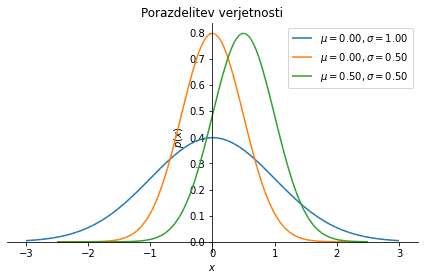

In [20]:
import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

podatki = {σ: 1., μ: 0.}

p1 = sym.plot(p.subs(podatki), (x, -3*σ.subs(podatki), +3*σ.subs(podatki)), line_color='C0', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False, 
              title='Porazdelitev verjetnosti', ylabel='$p(x)$', xlabel='$x$')

podatki = {σ: 0.5, μ: 0.}
p2 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C1', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
podatki = {σ: 0.5, μ: 0.5}
p3 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C2', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

S spodnjim izračunom lahko preverimo, da sta prvi moment in drugi centralni moment za Gaussovo/normalno porazdelitev dejansko $\mu$  in $\sigma^2$:

In [42]:
import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

m1 = sym.integrate(x*p, (x, -sym.oo, +sym.oo))
cm2 = sym.integrate((x-μ)**2 * p, (x, -sym.oo, +sym.oo))

m1

\mu

In [41]:
cm2

\sigma**2